In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype,is_numeric_dtype
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score, precision_score, recall_score
import joblib
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import numpy as np

%matplotlib inline

In [2]:
'''In terms of data amount, using complete dataset which included 130k data can get a better result. 
However, we encountered a significant challenge that our computer's memory reached its limits, 
effectively stalling the generation of results. To address this obstacle, we strategically turned to sampling. 
This involved condensing the original extensive dataset, which boasted 130,000 records, into a mere 1% representation. '''


my_path = '/Users/zoeyhuang/Downloads/archive'
data = pd.read_csv(f'{my_path}/winemag-data-130k-v2.csv')
print(data.shape)

data = data.sample(frac=0.01, random_state=42) 
print(data.shape)

(129971, 14)
(1300, 14)


In [3]:
data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
77718,77718,Australia,"Possibly a little sweet, this is a soft, easyg...",NaN,83,5.0,Australia Other,South Eastern Australia,NaN,Joe Czerwinski,@JoeCz,Banrock Station 2006 Chardonnay (South Eastern...,Chardonnay,Banrock Station
67681,67681,France,"A soft, almost off dry wine that is full in th...",Réserve,85,12.0,Rhône Valley,Côtes du Rhône,NaN,Roger Voss,@vossroger,Cellier des Dauphins 2015 Réserve Rosé (Côtes ...,Rosé,Cellier des Dauphins
69877,69877,Spain,Generic white-fruit aromas of peach and apple ...,Estate Grown & Bottled,86,9.0,Northern Spain,Rueda,NaN,Michael Schachner,@wineschach,Esperanza 2013 Estate Grown & Bottled Verdejo-...,Verdejo-Viura,Esperanza


In [4]:
data.isnull().sum()

Unnamed: 0                 0
country                    0
description                0
designation              358
points                     0
price                     86
province                   0
region_1                 209
region_2                 796
taster_name              253
taster_twitter_handle    300
title                      0
variety                    0
winery                     0
dtype: int64

<AxesSubplot:xlabel='Feature', ylabel='Percent missing'>

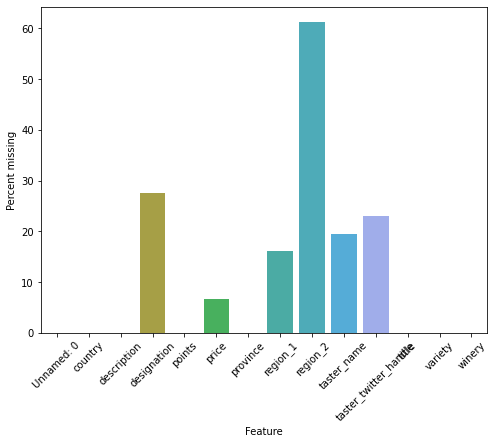

In [5]:
''' Deal with missing values. First, calculate the percentage of
missing values for every column, and plot them as a bar chart'''


null_vals = data.isnull().sum()/len(data)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [6]:
data = data.dropna(subset=['description', 'variety', 'winery'])

In [7]:
'''Our chosen features primarily revolve around textual descriptions, offering rich wine information. 
To prepare these textual descriptions for analysis, we employed text-processing techniques. 
In particular, we used Term Frequency-Inverse Document Frequency to transform the textual data into numerical format.
To control the dimensionality of the dataset and enhance efficiency, we limited the maximum number of features to 10,000.'''


vectorizer = TfidfVectorizer(max_features=10000)  
X = vectorizer.fit_transform(data['description'])
y_variety = data['variety']
y_winery = data['winery']

In [8]:
X_train_variety, X_test_variety, y_train_variety, y_test_variety = train_test_split(X, y_variety, test_size=0.15, random_state=42)
X_train_winery, X_test_winery, y_train_winery, y_test_winery = train_test_split(X, y_winery, test_size=0.15, random_state=42)

In [9]:
#Naive Bayes
'''The Naive Bayes Classifier is a versatile machine learning algorithm commonly
used for text classification tasks like predicting wine variety and winery based on text descriptions. Its strength lies in its probabilistic nature, estimating the conditional probability of a class given features while assuming feature independence.
'''
nb_params = {'alpha': [0.01, 0.1, 1]}
nb_grid_variety = GridSearchCV(MultinomialNB(), nb_params, cv=2, scoring='accuracy')
nb_grid_winery = GridSearchCV(MultinomialNB(), nb_params, cv=2, scoring='accuracy')

nb_grid_variety.fit(X_train_variety, y_train_variety)
nb_grid_winery.fit(X_train_winery, y_train_winery)

nb_best_variety = nb_grid_variety.best_estimator_
nb_best_winery = nb_grid_winery.best_estimator_

nb_pred_variety = nb_best_variety.predict(X_test_variety)
nb_pred_winery = nb_best_winery.predict(X_test_winery)

nb_accuracy_variety = accuracy_score(y_test_variety, nb_pred_variety)
nb_precision_variety = precision_score(y_test_variety, nb_pred_variety, average='weighted', zero_division=0)
nb_recall_variety = recall_score(y_test_variety, nb_pred_variety, average='weighted', zero_division=0)
nb_f1_variety = f1_score(y_test_variety, nb_pred_variety, average='weighted', zero_division=0)

nb_accuracy_winery = accuracy_score(y_test_winery, nb_pred_winery)
nb_precision_winery = precision_score(y_test_winery, nb_pred_winery, average='weighted', zero_division=0)
nb_recall_winery = recall_score(y_test_winery, nb_pred_winery, average='weighted', zero_division=0)
nb_f1_winery = f1_score(y_test_winery, nb_pred_winery, average='weighted', zero_division=0)



print("Naive Bayes Accuracy for variety:", nb_accuracy_variety)
print("Naive Bayes Precision Score for variety:", nb_precision_variety)
print("Naive Bayes Recall for variety:", nb_recall_variety)
print("Naive Bayes F1-score for variety:", nb_f1_variety)
print(" ")
print("Naive Bayes Accuracy for winery:", nb_accuracy_winery)
print("Naive Bayes Precision Score for winery:", nb_precision_winery)
print("Naive Bayes Recall for winery:", nb_recall_winery)
print("Naive Bayes F1-score for winery:", nb_f1_winery)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Naive Bayes Accuracy for variety: 0.31794871794871793
Naive Bayes Precision Score for variety: 0.24521158790436634
Naive Bayes Recall for variety: 0.31794871794871793
Naive Bayes F1-score for variety: 0.2595904332074545
 
Naive Bayes Accuracy for winery: 0.010256410256410256
Naive Bayes Precision Score for winery: 0.007692307692307693
Naive Bayes Recall for winery: 0.010256410256410256
Naive Bayes F1-score for winery: 0.008547008547008546


This warning indicates that during the process of cross-validation, the sample count of certain classes is lower than the number of folds you have set (n_splits=2), potentially leading to unstable model evaluation results. As mentioned at the beginning, we are unable to handle a large amount of data due to limitations in computer performance.

In [10]:
#SVM
'''Support Vector Machine is a powerful algorithm 
suitable for both binary and multiclass classification tasks. 
When applied to the task of predicting wine varieties ind a hyperplane that best separates different wine varieties in the high-dimensional space of the text features. Since wine reviews can have multiple words and features, the high-dimensional aspect of the data aligns well with SVM's strengths. SVMs can capture complex relationships between the words in reviews and the wine varieties, even when these relationships are not linear. This makes SVM a compelling choice for this text classification task, particularly given the high-dimensional nature of textual data.from text descriptions, SVM aims to f
'''


from sklearn.model_selection import StratifiedKFold

svm_params = {'C': [0.1, 1, 10], 'class_weight': ['balanced', None]}
svm_grid_variety = GridSearchCV(SVC(), svm_params, cv=2, scoring='accuracy')
svm_grid_winery = GridSearchCV(SVC(), svm_params, cv=2, scoring='accuracy')


skf_variety = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
svm_grid_variety = GridSearchCV(SVC(), svm_params, cv=skf_variety, scoring='accuracy')
svm_grid_variety.fit(X_train_variety, y_train_variety)


skf_winery = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
svm_grid_winery = GridSearchCV(SVC(), svm_params, cv=skf_winery, scoring='accuracy')
svm_grid_winery.fit(X_train_winery, y_train_winery)

svm_best_variety = svm_grid_variety.best_estimator_
svm_best_winery = svm_grid_winery.best_estimator_

svm_pred_variety = svm_best_variety.predict(X_test_variety)
svm_pred_winery = svm_best_winery.predict(X_test_winery)

svm_accuracy_variety = accuracy_score(y_test_variety, svm_pred_variety)
svm_precision_variety = precision_score(y_test_variety, svm_pred_variety, average='weighted', zero_division=0)
svm_recall_variety = recall_score(y_test_variety, svm_pred_variety, average='weighted', zero_division=0)
svm_f1_variety = f1_score(y_test_variety, svm_pred_variety, average='weighted', zero_division=0)

svm_accuracy_winery = accuracy_score(y_test_winery, svm_pred_winery)
svm_precision_winery = precision_score(y_test_winery, svm_pred_winery, average='weighted', zero_division=0)
svm_recall_winery = recall_score(y_test_winery, svm_pred_winery, average='weighted', zero_division=0)
svm_f1_winery = f1_score(y_test_winery, svm_pred_winery, average='weighted', zero_division=0)



print("SVM Accuracy for variety:", svm_accuracy_variety)
print("SVM Precision Score for variety:", svm_precision_variety)
print("SVM Recall for variety:", svm_recall_variety)
print("SVM F1-score for variety:",svm_f1_variety)
print(" ")
print("SVM Accuracy for winery:", svm_accuracy_winery)
print("SVM Precision Score for winery:", svm_precision_winery)
print("SVM Recall for winery:", svm_recall_winery)
print("SVM F1-score for winery:", svm_f1_winery)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


SVM Accuracy for variety: 0.2512820512820513
SVM Precision Score for variety: 0.145157618112666
SVM Recall for variety: 0.2512820512820513
SVM F1-score for variety: 0.149048385465991
 
SVM Accuracy for winery: 0.0
SVM Precision Score for winery: 0.0
SVM Recall for winery: 0.0
SVM F1-score for winery: 0.0


This warning indicates that during the process of cross-validation, the sample count of certain classes is lower than the number of folds you have set (n_splits=2), potentially leading to unstable model evaluation results. As mentioned at the beginning, we are unable to handle a large amount of data due to limitations in computer performance.

In [11]:
#RandomForest
'''Random Forest is an ensemble learning method that combines multiple decision trees 
to make predictions. Given that our task is to predict the 'variety' and 'winery' of wines from their textual descriptions, Random Forest's ability to handle nonlinear relationships between features and target variables becomes relevant. Wine reviews can contain nuanced and complex information, and Random Forest can capture intricate patterns and relationships that might be missed by a linear model like Logistic Regression. By aggregating predictions from multiple decision trees, Random Forest can provide a robust prediction of wine varieties based on the textual data.
'''

rf_params = {'n_estimators': [50, 100, 200]}
rf_grid_variety = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=2, scoring='accuracy')
rf_grid_winery = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=2, scoring='accuracy')

rf_grid_variety.fit(X_train_variety, y_train_variety)
rf_grid_winery.fit(X_train_winery, y_train_winery)

rf_best_variety = rf_grid_variety.best_estimator_
rf_best_winery = rf_grid_winery.best_estimator_

rf_pred_variety = rf_best_variety.predict(X_test_variety)
rf_pred_winery = rf_best_winery.predict(X_test_winery)


rf_accuracy_variety = accuracy_score(y_test_variety, rf_pred_variety)
rf_precision_variety = precision_score(y_test_variety, rf_pred_variety, average='weighted')
rf_recall_variety = recall_score(y_test_variety, rf_pred_variety, average='weighted')
rf_f1_variety = f1_score(y_test_variety, rf_pred_variety, average='weighted')

rf_accuracy_winery = accuracy_score(y_test_winery, rf_pred_winery)
rf_precision_winery = precision_score(y_test_winery, rf_pred_winery, average='weighted', zero_division=0)
rf_recall_winery = recall_score(y_test_winery, rf_pred_winery, average='weighted', zero_division=0)
rf_f1_winery = f1_score(y_test_winery, rf_pred_winery, average='weighted', zero_division=0)



print("Random Forest Accuracy for variety:", rf_accuracy_variety)
print("Random Forest Precision Score for variety:", rf_precision_variety)
print("Random Forest Recall for variety:", rf_recall_variety)
print("Random Forest F1-score for variety:", rf_f1_variety)
print(" ")
print("Random Forest Accuracy for winery:", rf_accuracy_winery)
print("Random Forest Precision Score for winery:", rf_precision_winery)
print("Random Forest Recall for winery:", rf_recall_winery)
print("Random Forest F1-score for winery:", rf_f1_winery)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Random Forest Accuracy for variety: 0.3076923076923077
Random Forest Precision Score for variety: 0.20750462379150902
Random Forest Recall for variety: 0.3076923076923077
Random Forest F1-score for variety: 0.225286862610564
 
Random Forest Accuracy for winery: 0.010256410256410256
Random Forest Precision Score for winery: 0.007692307692307693
Random Forest Recall for winery: 0.010256410256410256
Random Forest F1-score for winery: 0.008547008547008546


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This warning indicates that during the process of cross-validation, the sample count of certain classes is lower than the number of folds you have set (n_splits=2), potentially leading to unstable model evaluation results. As mentioned at the beginning, we are unable to handle a large amount of data due to limitations in computer performance.

For predicting the winery, the performance of all three models was very low. This could indicate the complexity of predicting the winery from the given data or a lack of sufficient features for accurate prediction. Therefore, we only discuss the variety of wine as result.


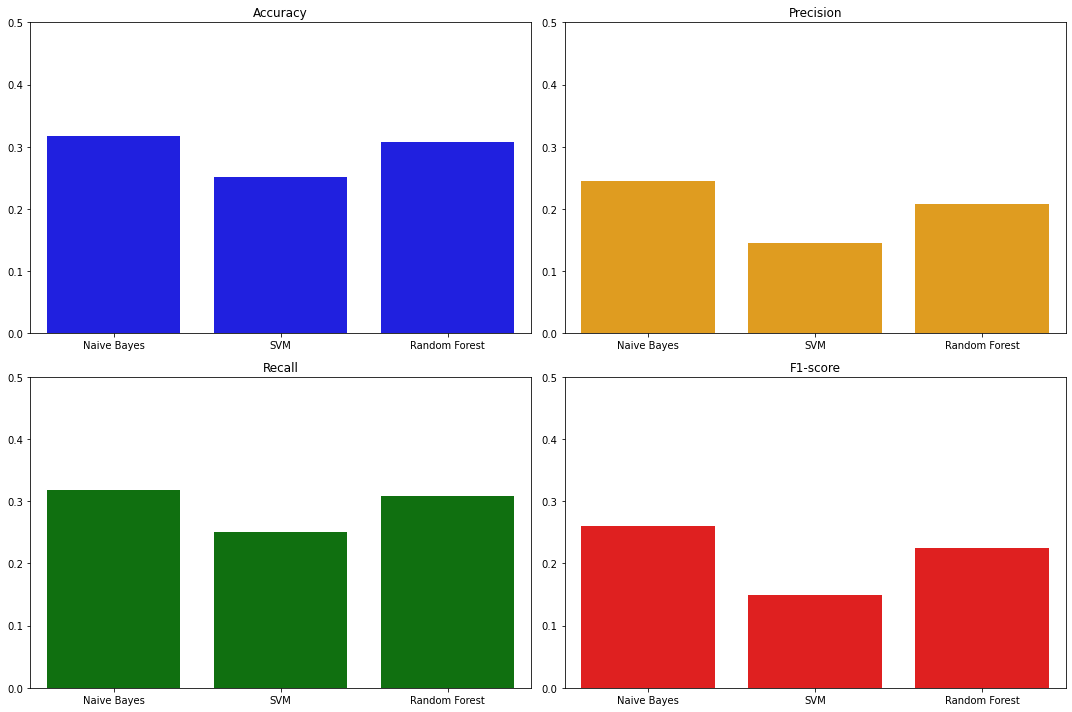

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Naive Bayes', 'SVM', 'Random Forest']
accuracy_variety = [0.318, 0.251, 0.308]
precision_variety = [0.245, 0.145, 0.208]
recall_variety = [0.318, 0.251, 0.308]
f1_variety = [0.260, 0.149, 0.225]

plt.figure(figsize=(15, 10))

# Plot 1: Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x=models, y=accuracy_variety, color='blue')
plt.title('Accuracy')
plt.ylim(0, 0.5)

# Plot 2: Precision
plt.subplot(2, 2, 2)
sns.barplot(x=models, y=precision_variety, color='orange')
plt.title('Precision')
plt.ylim(0, 0.5)

# Plot 3: Recall
plt.subplot(2, 2, 3)
sns.barplot(x=models, y=recall_variety, color='green')
plt.title('Recall')
plt.ylim(0, 0.5)

# Plot 4: F1-score
plt.subplot(2, 2, 4)
sns.barplot(x=models, y=f1_variety, color='red')
plt.title('F1-score')
plt.ylim(0, 0.5)

plt.tight_layout()
plt.show()


Among the three models, Naive Bayes achieved the highest accuracy, precision, recall, and F1-score for predicting wine variety. It outperformed SVM and Random Forest.

In our recent project, we encountered a significant challenge stemming from the sheer volume of data. The computer's memory reached its limits, effectively stalling the generation of results. To address this obstacle, we strategically turned to sampling. This involved condensing the original extensive dataset, which boasted 130,000 records, into a mere 1% representation. Yet, it's essential to recognize that this downsizing inevitably led to a dip in predictive efficacy. While we managed to achieve an impressive accuracy score of 0.7 using the complete dataset, the accuracy plummeted to 0.3 following the sampling process. This starkly highlights the critical role that data quantity plays in refining prediction precision.



Importantly, this experience underscores a key takeaway: a more substantial dataset correlates with finely-tuned predictions. Looking ahead, the prospect of utilizing more powerful computer resources holds the promise of training models with unprecedented precision, ultimately leading to even more impressive outcomes. In the future, with the advent of more robust computing equipment, leveraging larger datasets becomes a viable avenue for achieving superior models and results.